**1. Introducción**

Se realiza de forma automática el cálculo probabilistico de una distribución geométrica ( Cantidad de experiencias hasta observar el primer éxito ). Cálculo teórico:

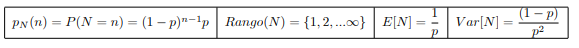

Tanto N como P deben ser ingresados por parametros, siendo P un valor entre 0 y 1.

El gráfico representa a la distribución geométrica dada una probabilidad con un rango de valores de la variable aleatoria.

**2. Armado de Ambiente**

No se requiere instalación previa

**3. Desarrollo**

In [ ]:
codigo = """
#include <iostream>
#include <vector>
#include <cstdlib>
#include <tgmath.h>
#include <cmath>
#include <iomanip>
#include <sys/time.h>
#include <omp.h>
#include <fstream>

static double dHashTiempoHistory[3];
static struct timeval tv;

#define TIEMPO_INI( h ) \
  gettimeofday(&tv,NULL); \
  dHashTiempoHistory[h] = tv.tv_sec + tv.tv_usec/1000000.0;

#define TIEMPO_FIN( h ) \
  gettimeofday(&tv,NULL); \
  dHashTiempoHistory[h] = ((tv.tv_sec + tv.tv_usec/1000000.0) - dHashTiempoHistory[h]) * 1000;

#define TIEMPO_GET(h) dHashTiempoHistory[h]

#define HTH_TOTAL           1
#define HTH_GEO_SEC         2
#define HTH_GEO_OMP         3

//------------------------------------------------------------------

using namespace std;

int main(int argc, char* argv[])
{
  int i;
  float resultadoSEC = 0, resultadoOMP = 0;
  ofstream archivoVec;
  archivoVec.open("archivoVec.txt");
  TIEMPO_INI(HTH_TOTAL)

  float probabilidad = atof(argv[1]);
  int cantidad_Exp = atoi(argv[2]);

  if(argc != 3)
  {
    std::cerr<<"Error en los parametros"<<std::endl;
    exit(1);
  }

  if(probabilidad < 0 or probabilidad > 1)
  {
    std::cerr<<"El valor de probabilidad debe ir entre 0 y 1"<<std::endl;
    exit(1);
  }

  if(cantidad_Exp <= 0)
  {
    std::cerr<<"La cantidad de experiencias debe ser mayor a 0"<<std::endl;
    exit(1);
  }  

//------------------------------------------------------------------

  std::vector<float> X(cantidad_Exp);

//------------------------------------------------------------------
//Funcion en forma secuencial

  TIEMPO_INI(HTH_GEO_SEC)

  for(i=cantidad_Exp;i>=1;i--)
    {
      X[i-1] = pow((1 - probabilidad), (i - 1)) * probabilidad;
      resultadoSEC += X[i-1];
    }

  TIEMPO_FIN(HTH_GEO_SEC) 

//------------------------------------------------------------------
//Funcion con OpenMP

  TIEMPO_INI(HTH_GEO_OMP)

    #pragma omp parallel for
    for(i=cantidad_Exp;i>=1;i--)
    {
      X[i-1] = pow((1 - probabilidad), (i - 1)) * probabilidad;  
      resultadoOMP += X[i-1]; 
    }

  TIEMPO_FIN(HTH_GEO_OMP)

  TIEMPO_FIN(HTH_TOTAL)

//------------------------------------------------------------------

archivoVec << "Posicion" << " - " << "Valor" <<std::endl;

//Guardo los valores del vector en un archivo txt
for(i=0;i<X.size();i++)
{
  archivoVec << std::fixed << std::setprecision(6) << i << " - " << X[i] <<std::endl;
}
std::cout<<"]"<<std::endl;

std::cout<<"Valores de tiempo"<<std::endl;
std::cout<<"Tiempo total: "<<TIEMPO_GET(HTH_TOTAL)<<" [ms]"<<std::endl;
std::cout<<"Tiempo SEC: "<<TIEMPO_GET(HTH_GEO_SEC)<<" [ms]"<<std::endl;
std::cout<<"Tiempo OMP: "<<TIEMPO_GET(HTH_GEO_OMP)<<" [ms]"<<std::endl;
std::cout<<"Valores probabilistico"<<std::endl;
std::cout<<"Probabilidad: "<<probabilidad<<std::endl;
std::cout<<"Cantidad exp: "<<cantidad_Exp<<std::endl;

archivoVec.close();

}
"""

file = open('probgeo.cpp', 'w')
file.write(codigo)
file.close()



In [ ]:
 ! g++ -o probgeo -fopenmp probgeo.cpp

In [ ]:
%env OPM_NUM_THREADS=2
!./probgeo 0.5 25

env: OPM_NUM_THREADS=2
VECTOR: []
Valores de tiempo
Tiempo total: 0.440121 [ms]
Tiempo SEC: 0.0128746 [ms]
Tiempo OMP: 0.41008 [ms]
Valores probabilistico
Probabilidad: 0.5
Cantidad exp: 25


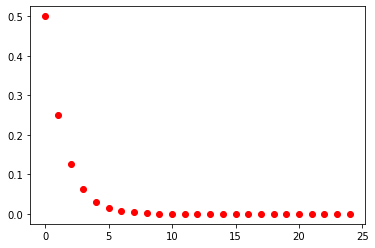

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file = "archivoVec.txt"
data = pd.read_csv(file,header = None, skiprows = 1, delimiter="-",error_bad_lines=False)

x = data.iloc[:,0]
y = data.iloc[:,1]

plt.plot(x,y,'ro')


**4. Tabla de Pasos**

Procesador | Función | Detalle
-----------|---------|--------
CPU c++ | #include | Se incluyen todas las librerías necesarias para ejecutar el programa
CPU c++ | #define | Se definen macros para medir el tiempo
CPU c++ | if argc | Se valida la cantidad de parametros
CPU c++ | if... if... | Se valida que ambos parametros sean correctos
CPU c++ | std::vector<double> X(cantidad_Exp); | Defino la memoria para el vector X
CPU c++ | TIEMPO_INI(HTH_GEO_SEC) | Se inicia a contar el tiempo de la ejecución secuencial
CPU c++ | for | Se realiza el cálculo de la distribución geométrica y se acumula el resultado
CPU c++ | TIEMPO_FIN(HTH_GEO_SEC) | Se finaliza el tiempo de la ejecución secuencial
CPU c++ | TIEMPO_INI(HTH_GEO_OMP) | Se inicia a contar el tiempo de la ejecución con omp
CPU c++ | #pragma omp parallel for | Esta directiva nos indica que la parte de código que la comprende puede ser ejecutada por varios hilos
CPU c++ | for | Se realiza el cálculo de la distribución geométrica y se acumula el resultado
CPU c++ | TIEMPO_FIN(HTH_GEO_OMP) | Se finaliza el tiempo de la ejecución con omp
CPU c++ | for | Se guarda en el archivo archivoVec.txt los valores que se fueron obteniendo de la distribución geométrica
CPU c++ | std::cout | Se muestra por pantalla los valores de tiempos y los valores de los parametros.
CPU python | import | Importa los módulos para funcionar
CPU python | pd.read_csv | Leo el archivo txt que se guarda cuando genero el vector
CPU python | data.iloc | le indico a X e Y que columnas corresponden del archivo
CPU python | plot | Muestro el gráfico, se incluyen los parametros x, 'y' y el color rojo


**5. Conclusión**

Después de una cierta cantidad de pruebas ejecutadas, podemos concluir que el uso de OpenMP introduce 2 beneficios muy importantes, bajo el contexto de HPC, que permite obtener buen desempeño en las aplicaciones que lo utilizan. 

Uno de ellos, es la mejora de la complejidad computacional. Ante la ejecución secuencial del cálculo de cada una de las probabilidades de la distribución geométrica, definimos que se trata de una complejidad O(n) siendo n el rango de valores de dicha distribución. Esta complejidad se puede reducir con el paralelismo que provee OpenMP ya que cada hilo va a ejecutar la misma cantidad de pasos sin importar el valor de n, esto quiere decir que la complejidad nos queda en O(1), o lo que es equivalente a una constante.

El segundo beneficio se da en la optimización del tiempo de ejecución. Cuando la cantidad de valores de la distribución a calcular (n) es notoriamente grande, podemos ver que el tiempo se reduce en gran medida. Sin embargo, ante una baja cantidad de valores, el tiempo se ve afectado con el paralelismo ya que la directiva "#pragma omp parallel for" introduce un tiempo de procesamiento necesario para su configuración, que sumado al tiempo de los calculos hace que la ejecución secuencial sea la mejor alternativa.



**6. Bibliografía**

Calculo de Distribución Geométrica [Link](https://mielhistorico.unlam.edu.ar/data/contenido/1111/PyEformulasv2.pdf)

Introducción a Colab [Link](https://www.youtube.com/watch?v=ICJP_ukNSQ0)

Libreria Pandas [Link](https://aprendeconalf.es/docencia/python/manual/pandas/)

Introducción Matplotlib [Link](https://programacion.net/articulo/introduccion_a_la_libreria_matplotlib_de_python_1599)

Conocimiento para leer archivos csv/txt en Python [Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

Complejidad Computacional [Link](https://cs.famaf.unc.edu.ar/~hoffmann/md18/04.html#ejemplo-de-algoritmo-en-tiempo-o1)